In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# %matplotlib inline

## Load the Dataset (Diabetes Dataset)

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df_diabetes = load_diabetes()

In [4]:
df_diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
## Check description of the dataset
print(df_diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## EDA & Data Cleaning
---

In [6]:
df = pd.DataFrame(df_diabetes.data, columns=df_diabetes.feature_names)
df['diabetes_prog'] = df_diabetes.target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
# Check for missing values
df.info()

print("-----------------------------------------------------")
print(f"Total sum of missing values: {df.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             442 non-null    float64
 7   s4             442 non-null    float64
 8   s5             442 non-null    float64
 9   s6             442 non-null    float64
 10  diabetes_prog  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
-----------------------------------------------------
Total sum of missing values: 0


In [9]:
## Summarizing the stats of the data 
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: >

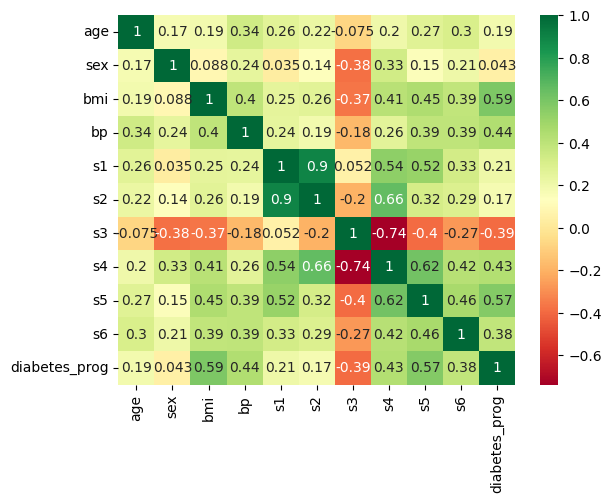

In [10]:
## Check correlation of the data 
import seaborn as sns

sns.heatmap(data=df.corr(method="pearson"),
            cmap="RdYlGn",
            annot=True,
           )

## Annotations: 
## Highest correlations: s5, bmi

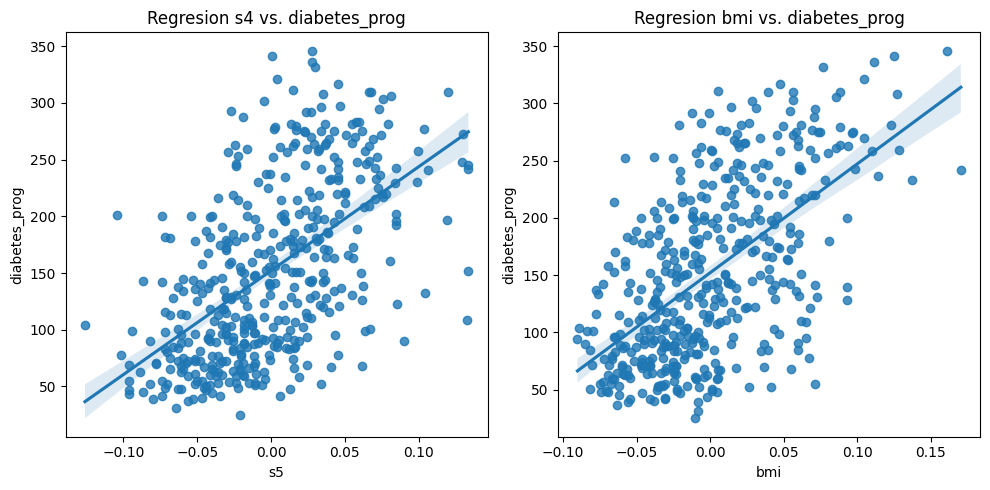

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=False)

# Plot regression s5 vs. target
sns.regplot(data=df, x='s5', y='diabetes_prog', ax=axes[0])
axes[0].set_title('Regresion s4 vs. diabetes_prog')

# Plot regression bmi vs. target
sns.regplot(data=df, x='bmi', y='diabetes_prog', ax=axes[1])
axes[1].set_title('Regresion bmi vs. diabetes_prog')

plt.tight_layout()
plt.show()

## Preparing Data for Model Training
---

In [12]:
## Independant and Dependant features 

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [13]:
print(f"""
    Independant Features: {X.columns}
    Dependant Feautres: {Y.head}      
      """)


    Independant Features: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
    Dependant Feautres: <bound method NDFrame.head of 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetes_prog, Length: 442, dtype: float64>      
      


In [14]:
## Train/Test split 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
## Standarize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

## Model Training

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train,Y_train)

LinearRegression()

In [23]:
## Check the coeffcients and intercept
print(f"""
      Coefficient:
      {regression.coef_}
      Intercept:
      {regression.intercept_}
      """)


      Coefficient:
      [  1.35246724 -12.45426893  26.21004615  18.61443344 -43.26039442
  24.2556288    5.73862584  13.96342685  31.57521526   1.98339354]
      Intercept:
      153.90291262135923
      


In [24]:
## Check parameters 
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
## Prediction with test data 
pred = regression.predict(X_test)

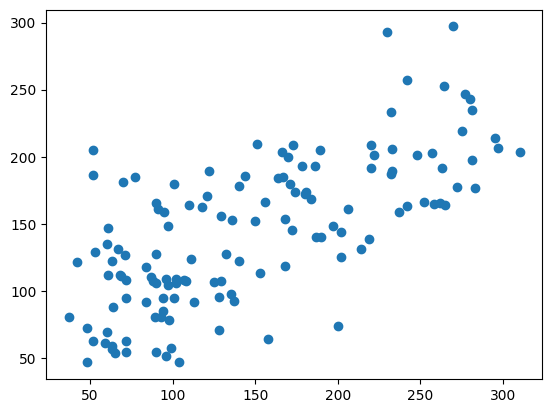

In [28]:
plt.scatter(Y_test, pred)

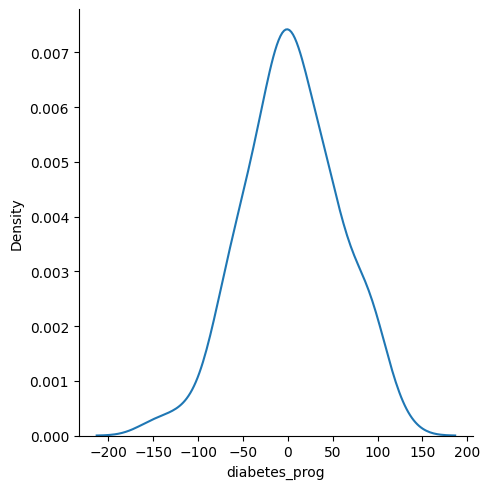

In [30]:
## Calculate the residuals
residuals = Y_test - pred

# Visualize the residuals
sns.displot(residuals, kind="kde")

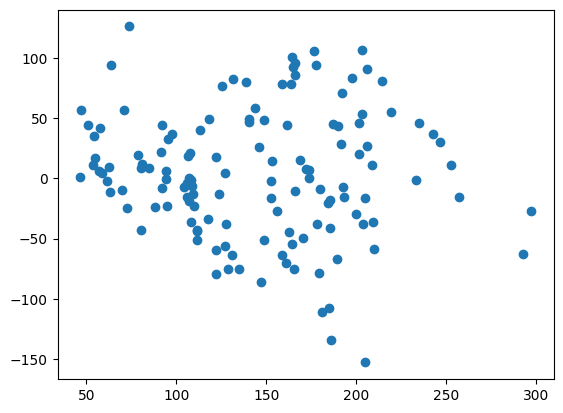

In [31]:
plt.scatter(pred, residuals)

## Notes
## No uniform distribution -> Model performance bad

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)

print(f"MSE: {mse} | MAE: {mae} | RMSE: {np.sqrt(mse)}")

MSE: 2821.750981001311 | MAE: 41.91937845679274 | RMSE: 53.120156070942706


In [38]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, pred)
adj_r2_score = 1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print(f"R2 Score: {score} | Adjusted R2 Score: {adj_r2_score}")

R2 Score: 0.4772897164322617 | Adjusted R2 Score: 0.43444461122179134


In [ ]:
# R Square and Adjusted R Square
